In [10]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split

In [11]:

# Define encoder
encoder = OneHotEncoder()

# This cell updates result list for images with tumor
data = []
result = []

In [12]:

def load_images_from_folder(folder, label):
    images = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.jpg', '.jpeg')):
            img = Image.open(os.path.join(folder, filename)).convert('L')  # Convert to grayscale
            img = img.resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128):
                img = np.expand_dims(img, axis=-1)  # Add a channel dimension
                images.append(img)
                result.append([label])
    return images


In [13]:

yes_images = load_images_from_folder('/home/yashd-dev/Documents/tumor-detection/Simple Classification/brain_tumor_dataset/yes', 0)
no_images = load_images_from_folder('/home/yashd-dev/Documents/tumor-detection/Simple Classification/brain_tumor_dataset/no', 1)

print(len(yes_images))
print(len(no_images))


154
97


In [14]:

if len(yes_images) == 0 or len(no_images) == 0:
    raise ValueError("No images found in one or more directories.")

data = np.array(yes_images + no_images)
result = np.array(result)

x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255




In [15]:
# Importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define LeNet architecture

model =Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(1, activation='sigmoid'))




/home/yashd-dev/Documents/tumor-detection/env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

Epoch 1/30


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6908 - loss: 0.6208 - val_accuracy: 0.6500 - val_loss: 0.6727
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7365 - loss: 0.5430 - val_accuracy: 0.6750 - val_loss: 0.6906
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7846 - loss: 0.5212 - val_accuracy: 0.7500 - val_loss: 0.5885
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8227 - loss: 0.4256 - val_accuracy: 0.7250 - val_loss: 0.5979
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8458 - loss: 0.3551 - val_accuracy: 0.7500 - val_loss: 0.6028
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8530 - loss: 0.3232 - val_accuracy: 0.7250 - val_loss: 0.6479
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9405 - loss: 0.1889 - val_accuracy: 0.7000 - val_loss: 0.6522
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9516 - loss: 0.1621 - val_accuracy: 0.7250 - val_loss: 0.5804
Epoch 9/30


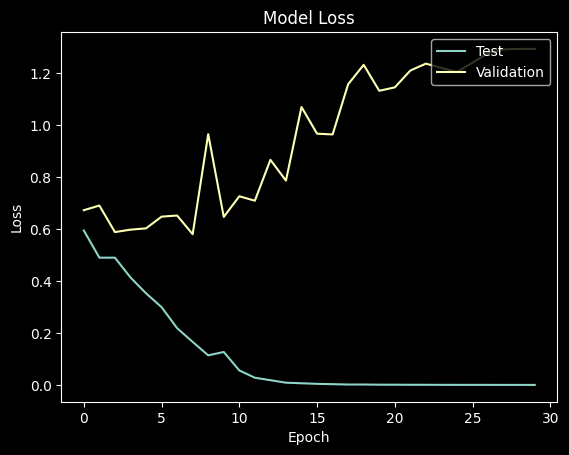

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

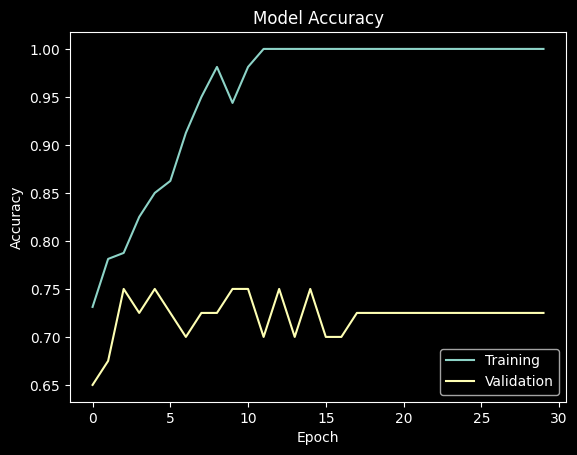

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
